## Import Libraries and Read Data

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [263]:
df = pd.read_csv("Datathon_SDS.csv")
df

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,114.0,128.0,118.0
1,male,group E,associate's degree,free/reduced,completed,111.0,146.0,132.0
2,male,group B,high school,free/reduced,completed,132.0,145.0,137.0
3,male,group B,some college,standard,completed,89.0,113.0,88.0
4,male,group A,associate's degree,standard,completed,118.0,134.0,119.0
...,...,...,...,...,...,...,...,...
995,male,group A,some high school,standard,none,130.0,149.0,139.0
996,male,group C,associate's degree,standard,completed,104.0,111.0,99.0
997,male,group C,bachelor's degree,free/reduced,completed,101.0,125.0,109.0
998,male,group C,bachelor's degree,free/reduced,completed,110.0,134.0,121.0


In [264]:
df.describe()

,math score,reading score,writing score
count,997.000000,996.000000,996.000000
mean,107.664995,122.341365,111.401606
std,16.758326,17.490096,16.297959
min,50.000000,51.000000,54.000000
25%,97.000000,113.000000,101.000000
50%,108.000000,124.000000,113.000000
75%,119.000000,134.000000,123.000000
max,149.000000,150.000000,144.000000


The above table describes the given dataset. It shows that mean, median, max, min and other statistical values. It can be seen that the maximum score is 150 and not 100.

## Introductory Questions

### 1. Add percentage column

In [265]:
# percentage = (sum of scores/total score) * 100
df['percentage']=round(((df['math score']+df['reading score']+df['writing score'])/450)*100,2)
df

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage
0,female,group B,bachelor's degree,standard,none,114.0,128.0,118.0,80.00
1,male,group E,associate's degree,free/reduced,completed,111.0,146.0,132.0,86.44
2,male,group B,high school,free/reduced,completed,132.0,145.0,137.0,92.00
3,male,group B,some college,standard,completed,89.0,113.0,88.0,64.44
4,male,group A,associate's degree,standard,completed,118.0,134.0,119.0,82.44
...,...,...,...,...,...,...,...,...,...
995,male,group A,some high school,standard,none,130.0,149.0,139.0,92.89
996,male,group C,associate's degree,standard,completed,104.0,111.0,99.0,69.78
997,male,group C,bachelor's degree,free/reduced,completed,101.0,125.0,109.0,74.44
998,male,group C,bachelor's degree,free/reduced,completed,110.0,134.0,121.0,81.11


In [266]:
df.describe()

,math score,reading score,writing score,percentage
count,997.000000,996.000000,996.000000,992.000000
mean,107.664995,122.341365,111.401606,75.851653
std,16.758326,17.490096,16.297959,9.480590
min,50.000000,51.000000,54.000000,39.330000
25%,97.000000,113.000000,101.000000,69.110000
50%,108.000000,124.000000,113.000000,76.440000
75%,119.000000,134.000000,123.000000,82.670000
max,149.000000,150.000000,144.000000,96.890000


The percentage of each student is calculated and added to the dataframe. Since the maximum score is taken to be 150, percentage is calculated by - percentage = (sum of scores/450)*100 
It can be seen that that the mean percentage is 75.85%. The max and min percentages are 96.89% and 39.33%.

### 2.Remove Null Data

In [267]:
df.isnull().sum()

gender                         0
race                           0
parental level of education    3
lunch                          0
test preparation course        0
math score                     3
reading score                  4
writing score                  4
percentage                     8
dtype: int64

From the above data it can be seen that the given dataset has 3 null values in parent level of education and 3,4 and 4 null values in math, reading and writing scores. These null values must either be replaced with average value or must be dropped.

In [268]:
# Math, Reading score and writing score have numeric null values
df = df.fillna(df.mean())
df = df.dropna()
df.isnull().sum()

gender                         0
race                           0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
percentage                     0
dtype: int64

The above table shows that there are no null values in the dataframe.

### 3. Reading Score Distribution

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='reading score', ylabel='Density'>

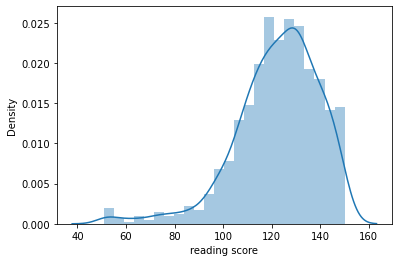

In [269]:
sns.distplot(df['reading score'])

The reading score distribution is left skewed.
Formula for left skewed: Skew = 3 * (Mean – Median) / Standard Deviation
- Left skewed graphs are also called negatively skewed  
- Large number of data values occur on the right side with a fewer number of data values on the left side.

### 4. Grading System

In [270]:
# function to determine grade based on score or percentage
def grade(score):
    if(score>=90):
        return 'S'
    elif(score>=80):
        return 'A'
    elif(score>=70):
        return 'B'
    elif(score>=60):
        return 'C'
    elif(score>=40):
        return 'D'
    else:
        return 'F'

In [271]:
df['grade'] = df["percentage"].map(grade)
df

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,grade
0,female,group B,bachelor's degree,standard,none,114.0,128.0,118.0,80.00,A
1,male,group E,associate's degree,free/reduced,completed,111.0,146.0,132.0,86.44,A
2,male,group B,high school,free/reduced,completed,132.0,145.0,137.0,92.00,S
3,male,group B,some college,standard,completed,89.0,113.0,88.0,64.44,C
4,male,group A,associate's degree,standard,completed,118.0,134.0,119.0,82.44,A
...,...,...,...,...,...,...,...,...,...,...
995,male,group A,some high school,standard,none,130.0,149.0,139.0,92.89,S
996,male,group C,associate's degree,standard,completed,104.0,111.0,99.0,69.78,C
997,male,group C,bachelor's degree,free/reduced,completed,101.0,125.0,109.0,74.44,B
998,male,group C,bachelor's degree,free/reduced,completed,110.0,134.0,121.0,81.11,A


The students have been assigned grades based on the percentages that have been calculated previously. A student scoring above 90 gets S grade, 80-90 - A, 70-80 gets B and so on. The lowest grade, F, is given to students scoring less than 40. The grades are added to dataframe using map function.

### 5. Distribution of Percentage based on Parent level of education

C:\Anaconda\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


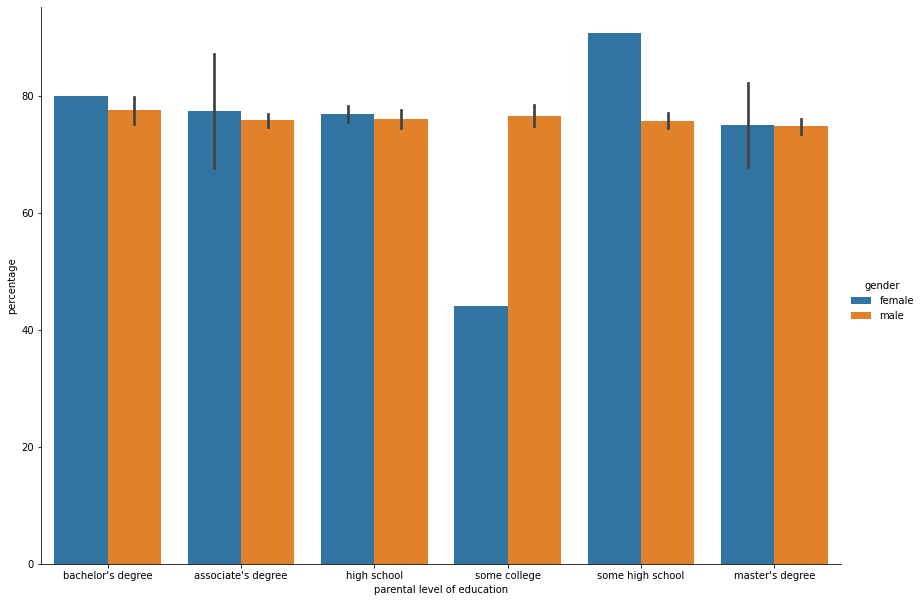

In [272]:
sns.factorplot(x='parental level of education',y='percentage',hue='gender', data=df,kind='bar',height=8.27, 
               aspect=11.7/8.27)

# Tasks

### Task 1

In [273]:
# Simple random sampling - Sample a
df_sample1 = df.sample(n=100)
df_sample1

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,grade
405,male,group B,associate's degree,free/reduced,completed,105.0,129.0,112.0,76.89,B
930,male,group E,some college,standard,completed,109.0,130.0,114.0,78.44,B
656,male,group E,associate's degree,standard,completed,119.0,123.0,108.0,77.78,B
311,male,group C,associate's degree,free/reduced,completed,108.0,116.0,101.0,72.22,B
688,male,group C,master's degree,standard,completed,95.0,114.0,88.0,66.00,C
...,...,...,...,...,...,...,...,...,...,...
564,male,group A,some college,standard,completed,90.0,107.0,90.0,63.78,C
884,male,group A,master's degree,standard,completed,96.0,107.0,98.0,66.89,C
992,male,group C,associate's degree,standard,completed,97.0,132.0,120.0,77.56,B
958,male,group B,master's degree,standard,completed,87.0,114.0,103.0,67.56,C


A random sample of 100 students have been generated.

In [274]:
df['race'].value_counts() # Number of students belonging to each race

group C    383
group A    263
group B    204
group E    101
group D     46
Name: race, dtype: int64

The above data shows the proportion of data according to race. Since the total number of students are 1000, it can be seen that the groups A,B,C,D and E have proportion percentages 26,20,39,5 and 10.

In [275]:
df_A = df[df['race'] == 'group A'] # dataframe consisting of all students belonging to race group A
df_B = df[df['race'] == 'group B'] # dataframe consisting of all students belonging to race group B
df_C = df[df['race'] == 'group C'] # dataframe consisting of all students belonging to race group C
df_D = df[df['race'] == 'group D'] # dataframe consisting of all students belonging to race group D
df_E = df[df['race'] == 'group E'] # dataframe consisting of all students belonging to race group E

In [276]:
# Obtaining random samples for each race
df_A = df_A.sample(n=26)
df_B = df_B.sample(n=20)
df_C = df_C.sample(n=39)
df_D = df_D.sample(n=5)
df_E = df_E.sample(n=10)

In [277]:
# Appending all samples to one dataframe
df_sample2 = df_A
df_sample2 = df_sample2.append(df_B)
df_sample2 = df_sample2.append(df_C)
df_sample2 = df_sample2.append(df_D)
df_sample2 = df_sample2.append(df_E)

In [278]:
# Sample b - stratified
df_sample2

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,grade
473,male,group A,associate's degree,standard,completed,101.0,123.0,105.0,73.11,B
676,male,group A,master's degree,free/reduced,completed,115.0,134.0,120.0,82.00,A
798,male,group A,associate's degree,standard,completed,111.0,116.0,98.0,72.22,B
29,male,group A,associate's degree,standard,completed,123.0,126.0,119.0,81.78,A
203,male,group A,some high school,standard,completed,99.0,98.0,112.0,68.67,C
...,...,...,...,...,...,...,...,...,...,...
615,male,group E,high school,standard,completed,102.0,124.0,116.0,76.00,B
313,male,group E,associate's degree,standard,completed,110.0,123.0,113.0,76.89,B
687,male,group E,associate's degree,standard,completed,119.0,134.0,117.0,82.22,A
620,male,group E,associate's degree,standard,completed,77.0,117.0,98.0,64.89,C


The above dataset has been generated by stratified sampling. The number of records for each race in sample is in proportion to the population. This has been done by first obtaining 5 different dataframes for each race. Then a random sample is collected from each dataframe. These samples are then merged to get a stratified sample. The groups A,B,C,D and E have 26,20,39,5 and 10 records respectively.

In [279]:
print("Population Mean: ",round(df['math score'].mean(),2))
print()
#Sample 1
print("Mean for Sample a: ", round(df_sample1['math score'].mean(),2))
err = (df_sample1['math score'].mean()- df['math score'].mean())/df['math score'].mean()*100
print("Sampling Error for Sample a: ", round(err,2),"%")
#Sample 2
print("Mean for Sample b: ", round(df_sample2['math score'].mean(),2))
err = (df_sample2['math score'].mean()- df['math score'].mean())/df['math score'].mean()*100
print("Sampling Error for Sample b: ", round(err,2),"%")

Population Mean:  107.63

Mean for Sample a:  109.39
Sampling Error for Sample a:  1.63 %
Mean for Sample b:  111.27
Sampling Error for Sample b:  3.38 %


 The sample means for math scores for a and b are 109.39 and 111.27. The mean for population was calculated to be 107.63. The sampling error for a and b are 1.63% and 3.38%. Hence, a is a better sample than b since it has a lower sampling error. 

<AxesSubplot:xlabel='race'>

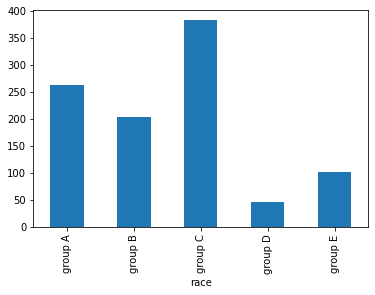

In [280]:
# race distribution for population
df.groupby(['race']).size().plot(kind='bar')

<AxesSubplot:xlabel='race'>

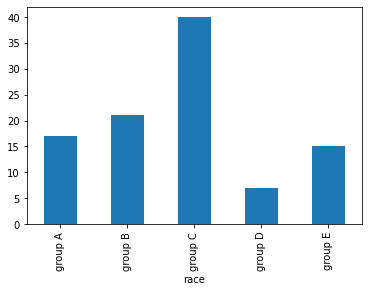

In [281]:
# race distribution for sample a
df_sample1.groupby(['race']).size().plot(kind='bar')

<AxesSubplot:xlabel='race'>

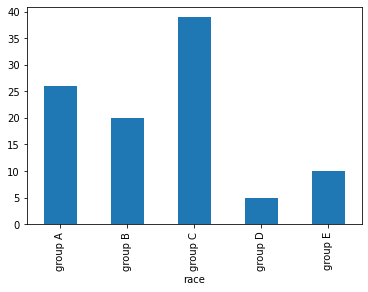

In [286]:
# race distribution for sample b
df_sample2.groupby(['race']).size().plot(kind='bar')

The above bar charts show the distribution of race in population and samples a and b. It can be seen that the distribution of race is similar in sample b and population and varies slightly in sample a.
However, from the data calculated in previous steps sample a has a lower error compared to b and is hence a better sample. It can thus be inferred that race does not play a significant role in student perfomance.

### Task 2

<AxesSubplot:xlabel='race', ylabel='math score'>

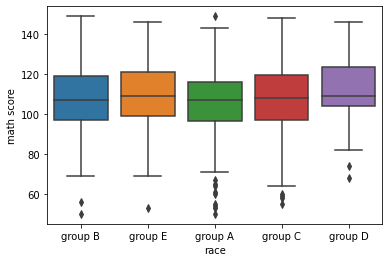

In [283]:
sns.boxplot(x='race', y='math score', data=df)

The above boxplots show the distribution of data for math score. It is seen that Group A has the highest number of outliers.

<AxesSubplot:xlabel='race', ylabel='reading score'>

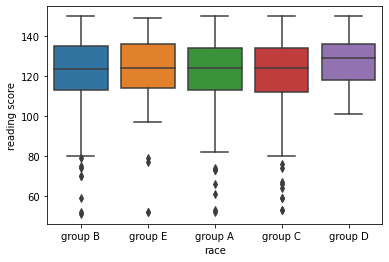

In [284]:
sns.boxplot(x='race', y='reading score', data=df)

The above boxplots show the distribution of data for reading score. It is seen that Group C has the highest number of outliers. Group A and B also has a lot of outlier values.

<AxesSubplot:xlabel='race', ylabel='writing score'>

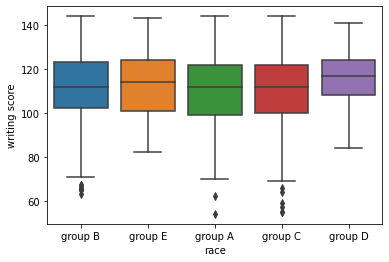

In [285]:
sns.boxplot(x='race', y='writing score', data=df)

The above boxplots show the distribution of data for writing score. It is seen that Group C has the highest number of outliers.